# **Leitura dos arquivos e mudanças de índices**

Rafael dos Santos - 2 ENG A

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

# Introdução
Se a idade de casamento e a quantidade de filhos que as mulheres tem afeta o IDH.


In [3]:
#Leitura dos arquivos em Excel

HDI = pd.read_excel('hdi_human_development_index.xlsx')
Children_Woman = pd.read_excel('children_per_woman_total_fertility.xlsx')
Age_marriage = pd.read_excel('age_at_1st_marriage_women.xlsx')

In [4]:
#Selecionar apenas o ano de 2005, pois é o ano com mais dados

HDI_2005 = HDI.loc[:, ["geo", 2005]]
Children_Woman_2005 = Children_Woman.loc[:, ["geo", 2005]]
Age_marriage_2005 = Age_marriage.loc[:, ['geo',2005]]

Index change

In [5]:
HDI_idx = HDI_2005.set_index('geo')
Children_Woman_idx = Children_Woman_2005.set_index('geo')
Age_marriage_idx = Age_marriage_2005.set_index('geo')
Age_marriage_idx['2005_Marriage'] = Age_marriage_idx.pop(2005)
HDI_idx = HDI_idx.dropna()
Children_Woman_idx = Children_Woman_idx.dropna()
Age_marriage_idx = Age_marriage_idx.dropna()

DataFrame join

In [6]:
df = HDI_idx.join(Children_Woman_idx, how='inner', lsuffix='_HDI', rsuffix='_Children')
df = df.join(Age_marriage_idx, how='inner')
df.head(7)

,2005_HDI,2005_Children,2005_Marriage
geo,,,
Afghanistan,0.405,6.83,17.8
Albania,0.696,1.75,23.3
Algeria,0.686,2.50,29.6
Argentina,0.782,2.45,23.3
Armenia,0.692,1.40,23.0
Australia,0.915,1.86,28.9
Austria,0.854,1.41,28.9


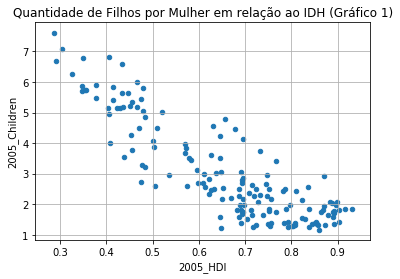

In [7]:
df.plot.scatter(x="2005_HDI", y="2005_Children", grid=True, title= "Quantidade de Filhos por Mulher em relação ao IDH (Gráfico 1)");

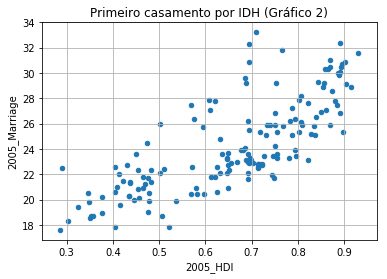

In [15]:
df.plot.scatter(x="2005_HDI", y="2005_Marriage", grid=True, title= "Primeiro casamento por IDH (Gráfico 2)");

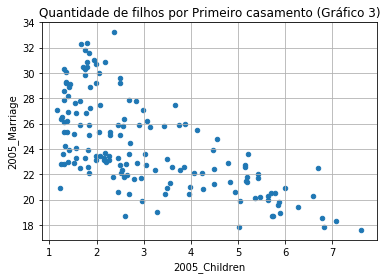

In [9]:
df.plot.scatter(x="2005_Children", y="2005_Marriage", grid=True, title= "Quantidade de filhos por Primeiro casamento (Gráfico 3)");

Tabela de Corelação 

In [19]:
df.corr()

,2005_HDI,2005_Children,2005_Marriage
2005_HDI,1.000000,-0.868473,0.762423
2005_Children,-0.868473,1.000000,-0.655110
2005_Marriage,0.762423,-0.655110,1.000000


# Conclusão
A necessidade de estudos para melhor atender o mercado de trabalho dos paises com um maior idh, faz com que muitas mulheres busquem uma vida academica mais completa e essa decisão normalmente faz com que o casamento aconteça de forma mais tardia e o acesso a informação que os estudos fornecem provem ajuda as mulheres a ter filhos planejados.

In [ ]:
csv = df.to_csv()

with open('arquivo.csv', 'w') as arq:
    arq.write(csv)